# SENTIMENT ANALYSIS OF REVIEWS USING MULTINOMIAL NAIVE BAYES

### Importing necssary Libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import seaborn as sns
import matplotlib.pyplot as plt

### Creating Synthetic Review Data

In [32]:
# Sample data
positive_reviews = [
    "I love this product",
    "This is amazing",
    "Best purchase ever",
    "I am very happy with the service",
    "Absolutely fantastic experience",
    "Highly recommended",
    "Superb quality and fast delivery",
    "The product exceeded my expectations",
    "I am extremely satisfied",
    "Worth every penny"
]

negative_reviews = [
    "I hate this product",
    "Very disappointing",
    "Worst experience ever",
    "I am not happy with this service",
    "Terrible quality",
    "I will never buy this again",
    "Completely dissatisfied",
    "Waste of money",
    "Bad experience overall",
    "Not worth the price"
]

### Create Dataframe 

In [ ]:
data = pd.DataFrame({
    "review": positive_reviews + negative_reviews,
    "label": ["positive"] * len(positive_reviews) + ["negative"] * len(negative_reviews)
})

### Shuffle the dataset

In [34]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [35]:
print("Synthetic Dataset:")
print(data.head())

Synthetic Dataset:
                        review     label
0          I love this product  positive
1               Waste of money  negative
2  I will never buy this again  negative
3              This is amazing  positive
4     I am extremely satisfied  positive


### Convert Reviews to Numerical Features

In [36]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["review"])
y = data["label"]

### Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train Multinomial Naive bayes Model

In [38]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [39]:
y_pred = model.predict(X_test)
y_pred

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'positive'], dtype='<U8')

### Prediction & metrics

In [40]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.25      0.40         4
    positive       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



### Confusion Matrix

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])

print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[2 0]
 [3 1]]


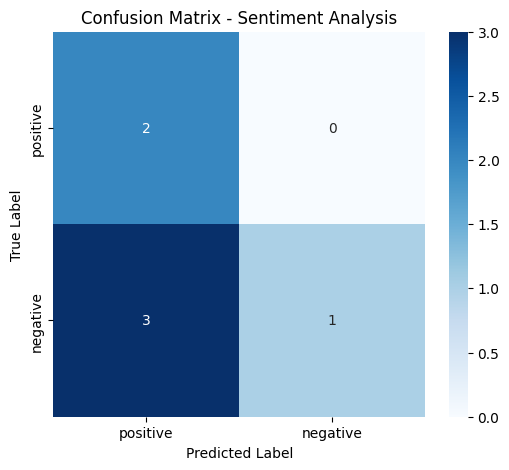

In [42]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.title("Confusion Matrix - Sentiment Analysis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Custom sentiment stopwords to remove irrelevant words

In [43]:
extra_stopwords = {"im", "its", "was", "very"}

stopwords = set(ENGLISH_STOP_WORDS).union(extra_stopwords)

In [45]:
def get_clean_word_counts(text):
    words = text.lower().split()
    words = [w for w in words if w.isalpha() and w not in stopwords]  # keep only meaningful words
    return pd.Series(words).value_counts().head(10)

positive_text = " ".join(data[data["label"] == "positive"]["review"])
negative_text = " ".join(data[data["label"] == "negative"]["review"])

In [46]:
positive_counts = get_clean_word_counts(positive_text)
negative_counts = get_clean_word_counts(negative_text)

### Plot most frequent positive words

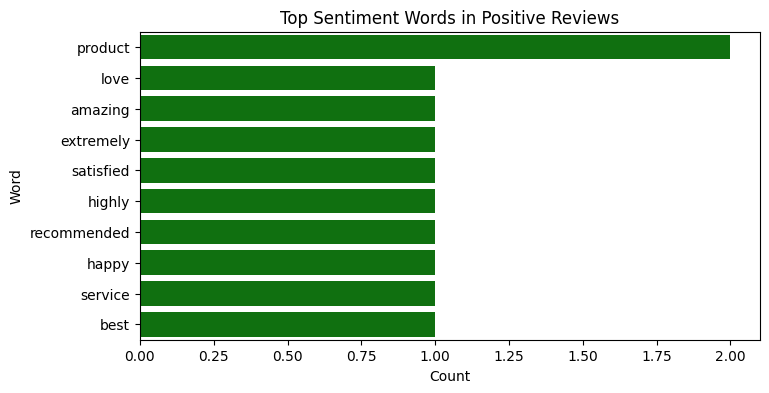

In [47]:
plt.figure(figsize=(8, 4))
sns.barplot(x=positive_counts.values, y=positive_counts.index, color='green')
plt.title("Top Sentiment Words in Positive Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

### Plot most frequent Negative words

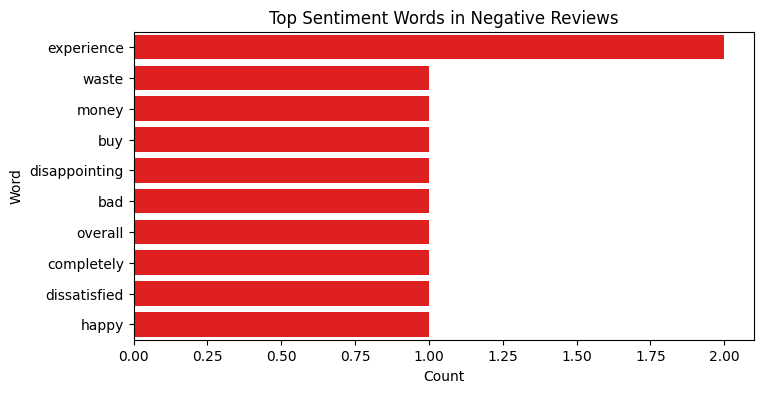

In [48]:
plt.figure(figsize=(8, 4))
sns.barplot(x=negative_counts.values, y=negative_counts.index, color='red')
plt.title("Top Sentiment Words in Negative Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

# SENTIMENT ANALYSIS OF REVIEWS USING BERNOULLI NAIVE BAYES

### Importing necssary Libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

### Create Synthetic Review Data

In [50]:
positive_reviews = [
    "I love this product",
    "This is amazing",
    "Best purchase ever",
    "I am very happy with the service",
    "Absolutely fantastic experience",
    "Highly recommended",
    "Superb quality and fast delivery",
    "The product exceeded my expectations",
    "I am extremely satisfied",
    "Worth every penny"
]

negative_reviews = [
    "I hate this product",
    "Very disappointing",
    "Worst experience ever",
    "I am not happy with this service",
    "Terrible quality",
    "I will never buy this again",
    "Completely dissatisfied",
    "Waste of money",
    "Bad experience overall",
    "Not worth the price"
]

### Create Dataframe

In [51]:
data = pd.DataFrame({
    "Review": positive_reviews + negative_reviews,
    "Label": ["positive"] * len(positive_reviews) +
             ["negative"] * len(negative_reviews)
})

### Shuffle the Dataset

In [52]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [54]:
print("Synthetic Dataset (Shuffled):")
print(data)

Synthetic Dataset (Shuffled):
                                  Review     Label
0                    I love this product  positive
1                         Waste of money  negative
2            I will never buy this again  negative
3                        This is amazing  positive
4               I am extremely satisfied  positive
5                     Highly recommended  positive
6                     Very disappointing  negative
7       I am very happy with the service  positive
8                 Bad experience overall  negative
9                Completely dissatisfied  negative
10      I am not happy with this service  negative
11                    Best purchase ever  positive
12                     Worth every penny  positive
13                   Not worth the price  negative
14       Absolutely fantastic experience  positive
15                 Worst experience ever  negative
16  The product exceeded my expectations  positive
17                   I hate this product  negative
1

### Convert Reviews to Numerical Features

In [55]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(data["Review"])
y = data["Label"]

### Train Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train the Bernoulli Naive Bayes Model

In [57]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [58]:
y_pred = model.predict(X_test)
y_pred

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive'], dtype='<U8')

### Prediction & Metrics

In [59]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
    positive       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusiion Matrix

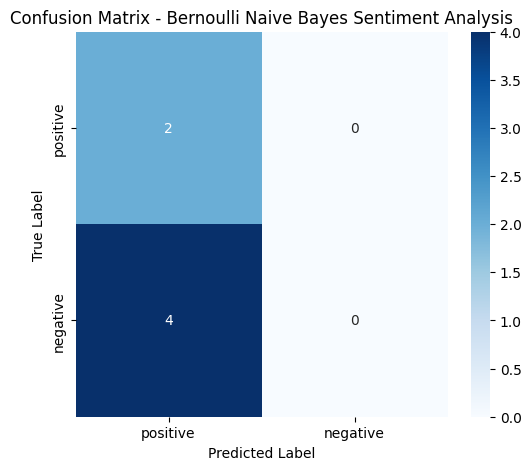

In [60]:
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.title("Confusion Matrix - Bernoulli Naive Bayes Sentiment Analysis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Custom sentiment stopwords to remove irrelevant words

In [61]:
extra_stopwords = {"im", "its", "was", "very"}
stopwords = set(ENGLISH_STOP_WORDS).union(extra_stopwords)

In [62]:
def clean_and_count(text):
    words = text.lower().split()
    words = [w for w in words if w.isalpha() and w not in stopwords]
    return pd.Series(words).value_counts().head(10)

positive_text = " ".join(data[data["Label"] == "positive"]["Review"])
negative_text = " ".join(data[data["Label"] == "negative"]["Review"])

In [63]:
positive_counts = clean_and_count(positive_text)
negative_counts = clean_and_count(negative_text)

### Plot most frequent Positive words

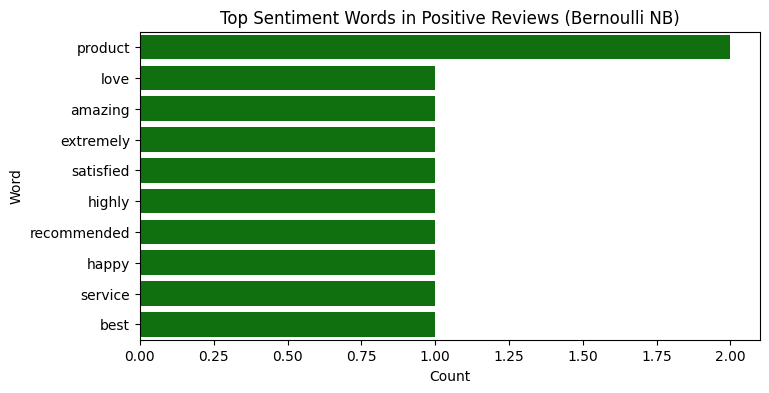

In [64]:
plt.figure(figsize=(8, 4))
sns.barplot(x=positive_counts.values, y=positive_counts.index, color='green')
plt.title("Top Sentiment Words in Positive Reviews (Bernoulli NB)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

### Plot most frequent Negative words

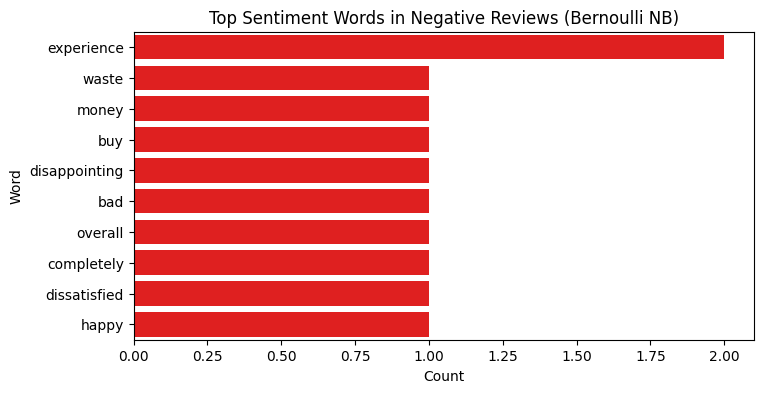

In [65]:
plt.figure(figsize=(8, 4))
sns.barplot(x=negative_counts.values, y=negative_counts.index, color='red')
plt.title("Top Sentiment Words in Negative Reviews (Bernoulli NB)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()